In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = 'Arial'
plt.rcParams.update({'font.size': 24})

import numpy as np
import glob

In [2]:
Y = []
for sw in range(1,11):
    valid_loss_all = 0.0
    for fold_num in range(10):        
        df = pd.read_csv('./model_files/sw_test+kfold/sw'+str(sw)+'_fold'+str(fold_num)+'/kfold_'+str(fold_num)+'.csv')
        valid = df[df['Train/Valid/Test'] == 'Valid']
        valid['AE'] = np.abs(valid.CN - valid.predicted)
        valid_loss_all += np.sum(valid['AE'])
    valid_loss_all /= len(df)
    
    print(sw,np.round(valid_loss_all,2))
    Y.append(np.round(valid_loss_all,2))

/Users/kyj/opt/anaconda3/envs/ykim/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1 6.1
2 6.03
3 5.84
4 5.75
5 5.61
6 5.34
7 5.52
8 5.51
9 5.63
10 5.6


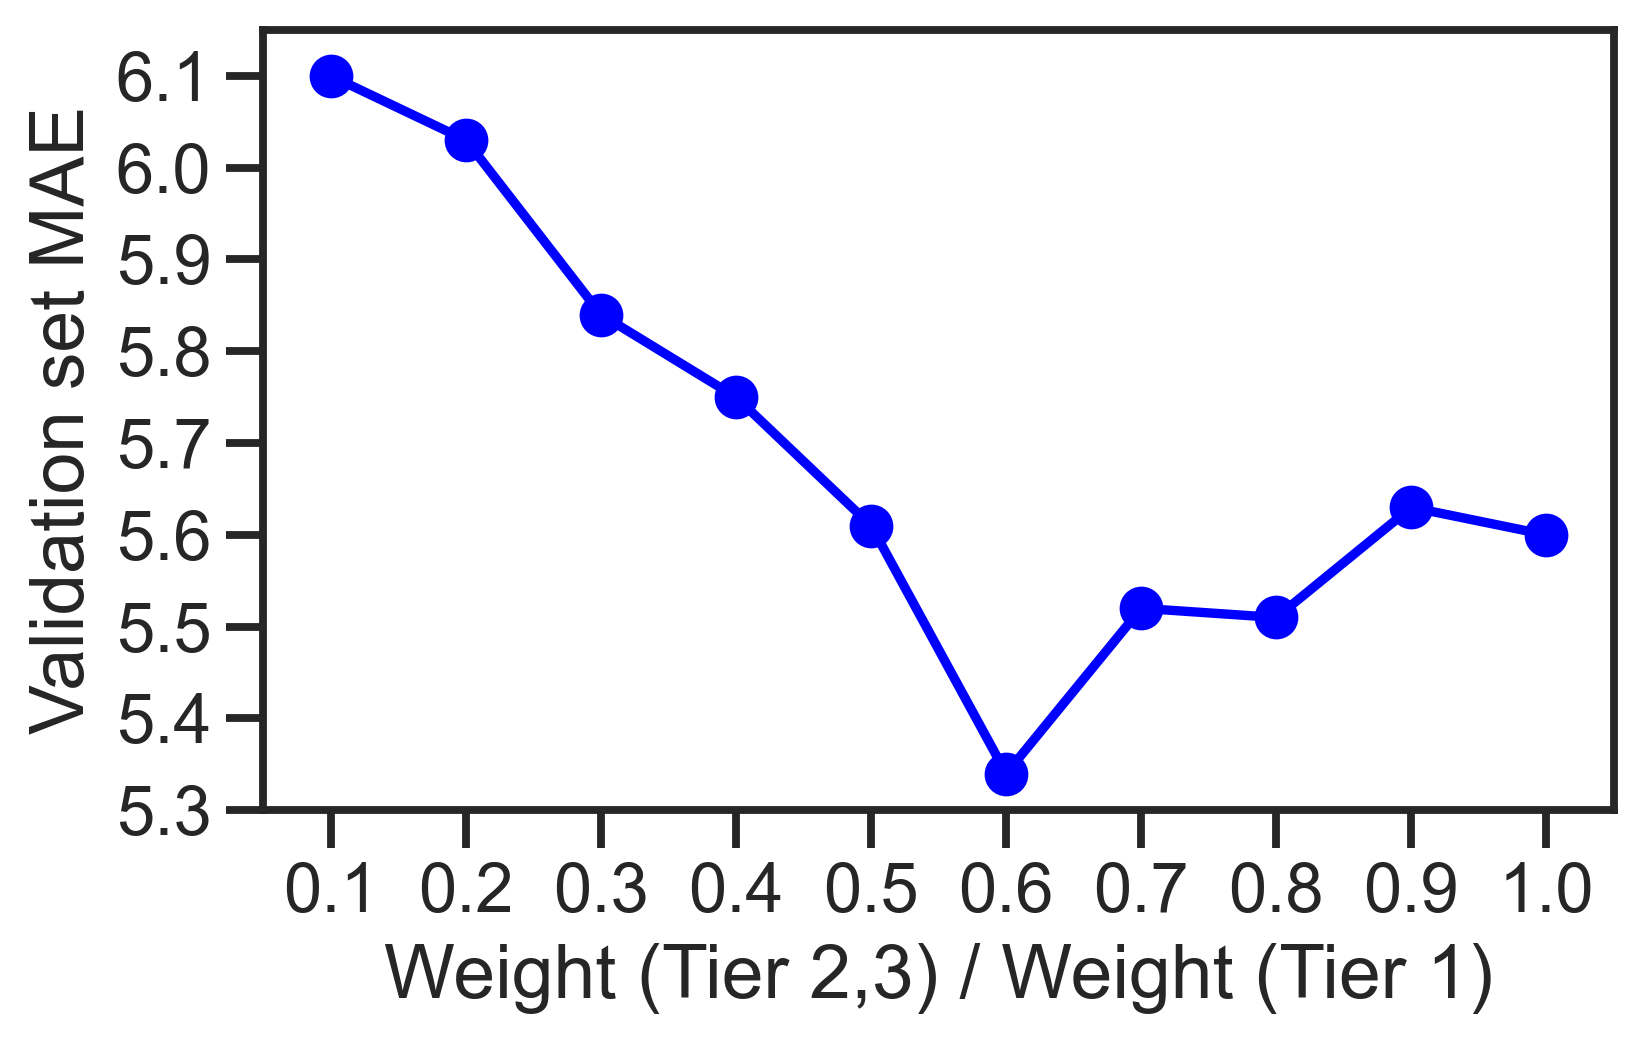

In [3]:
X = np.arange(0.1,1.01,0.1)

plt.scatter(X,Y, c='blue')
plt.plot(X,Y, c='blue')

plt.xlim([0.05,1.05])
plt.ylim([5.3,6.15])
plt.xticks(np.arange(0.1,1.01,0.1))
plt.yticks(np.arange(5.3,6.11,0.1))

plt.xlabel('Weight (Tier 2,3) / Weight (Tier 1)')
plt.ylabel('Validation set MAE')
plt.tight_layout()
#plt.grid()

In [4]:
sw6_valid_all = [pd.read_csv('./model_files/sw_test+kfold/sw6_fold'+str(fold_num)+'/kfold_'+str(fold_num)+'.csv') \
                      for fold_num in range(0,10)]

sw6_valid_all = pd.concat(sw6_valid_all, ignore_index=True)
sw6_valid_all = sw6_valid_all[sw6_valid_all['Train/Valid/Test'] == 'Valid']
sw6_valid_all['AE'] = np.abs(sw6_valid_all.CN - sw6_valid_all.predicted)

In [5]:
print(sw6_valid_all.AE.mean())
print(sw6_valid_all[sw6_valid_all['Device_tier'] == 1].AE.mean())
print(sw6_valid_all[sw6_valid_all['Device_tier'] != 1].AE.mean())

5.33863382863492
4.763771243792325
6.7004740697326195


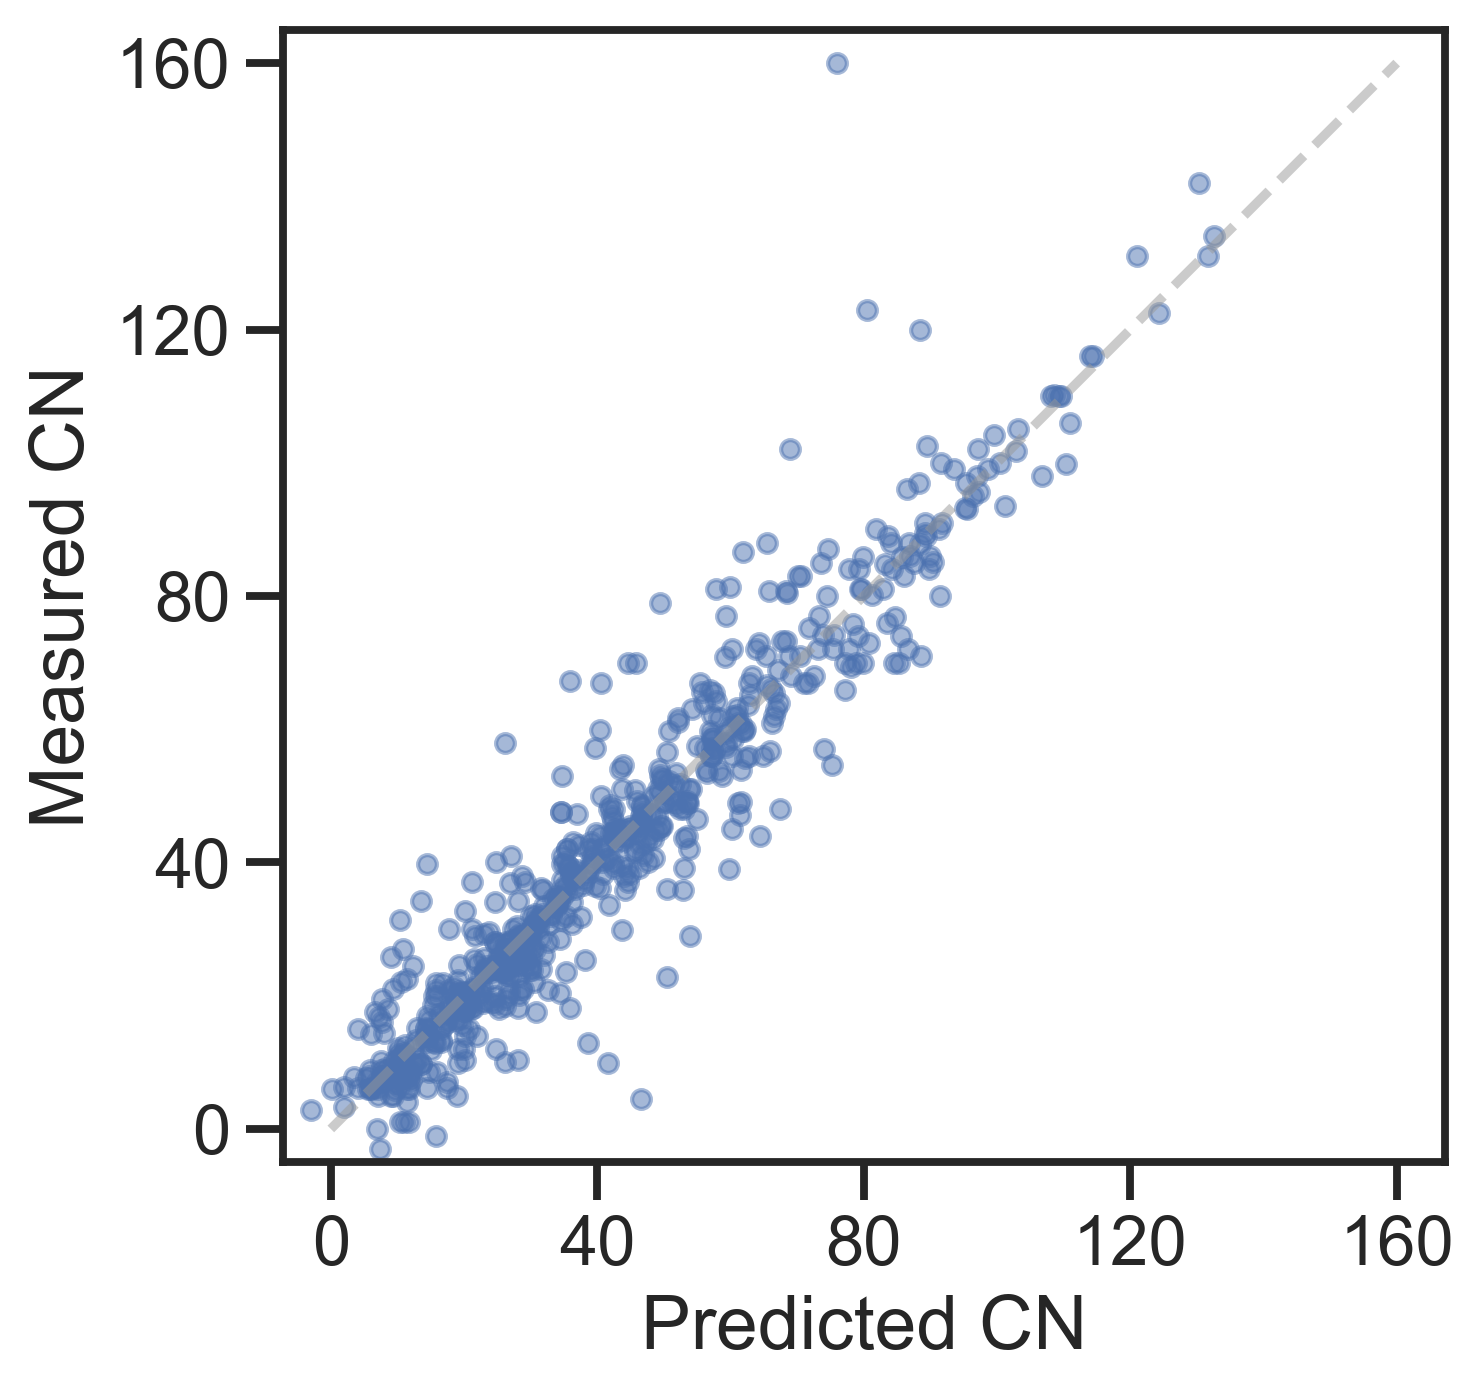

In [6]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.axis('equal')
ax.set_xlim([-5,165])
ax.set_ylim([-5,165])
ax.set_xticks(np.arange(0.0,160.01,40.0))
ax.set_yticks(np.arange(0.0,160.01,40.0))
ax.set_xlabel('Predicted CN')
ax.set_ylabel('Measured CN')

#ax.set_title('10-fold cross validation \n (Validation set from each fold,\n  Sample weight = 0.6)')
ax.plot(sw6_valid_all['predicted'], sw6_valid_all['CN'], '.',  ms=9, alpha=0.5)
#ax.legend(loc='center left', bbox_to_anchor=(1, .5))
ax.plot([0,160], [0, 160], '--', color='.6', alpha=.5)

#fig.tight_layout()

In [7]:
sw6_valid_all = sw6_valid_all.sort_values(by=['AE'], ascending = False)

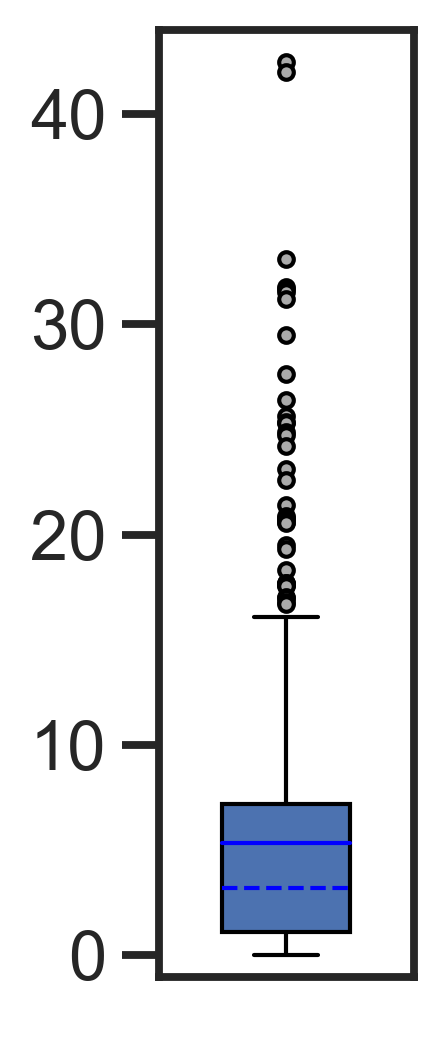

In [8]:
fig = plt.figure(figsize=(2,4))
ax = fig.add_subplot(111)
ax.boxplot(sw6_valid_all['AE'], widths = 0.5, 
           patch_artist = True, showmeans = True, 
           meanline = True, 
           bootstrap = 1000, notch = False, labels = [''], 
           #whis = (0,95),
           medianprops = {'color': 'blue', 'linestyle': '--'}, meanprops = {'color':'blue', 'linestyle': '-'},
           flierprops = {'marker': '.', 'markersize': 7, 'markerfacecolor':'#AAAAAA'})
ax.set_xticks([])
ax.set_ylim([-1,44])
plt.tight_layout()

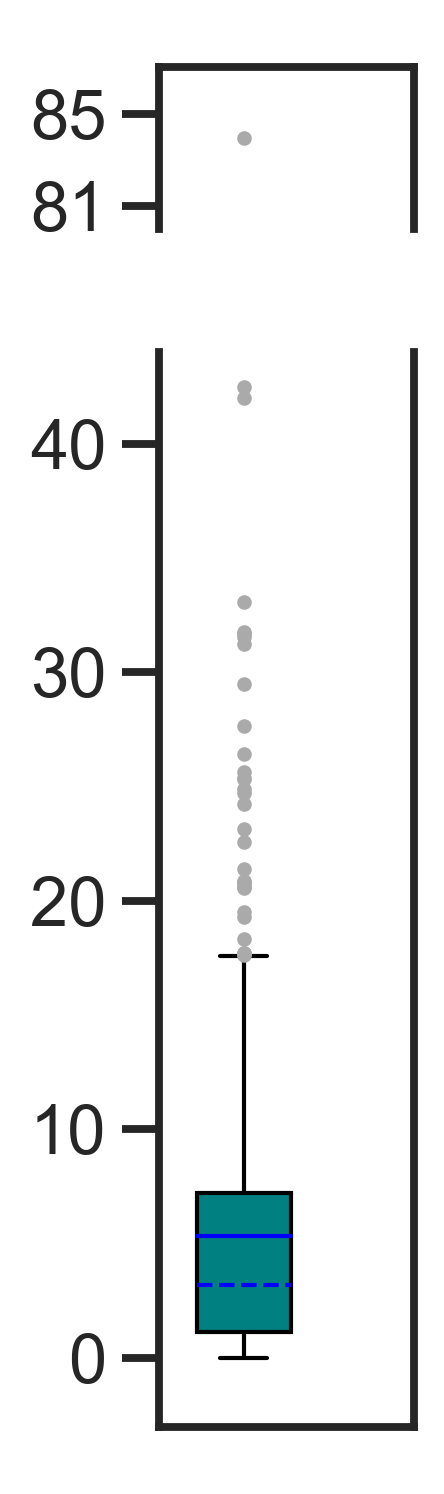

In [9]:
f, (ax2, ax) = plt.subplots(2, 1, sharex = True, figsize=(2,5.5), gridspec_kw={'height_ratios': [.15,1]})
f.subplots_adjust(hspace = 0, wspace = 0)
ax2.set_ylim([80,87])
ax2.set_yticks([81,85])
ax.set_ylim([-3,44])
ax.set_xlim([0,5])
ax.set_yticks([0,10,20,30,40])
ax2.set_xlim([0,3])

#ax = fig.add_subplot(111)
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.xaxis.tick_top()
ax2.tick_params(labeltop=False)
ax.xaxis.tick_bottom()

ax.boxplot(sw6_valid_all['AE'], widths = 1.1, 
           patch_artist = True, showmeans = True, 
           meanline = True, 
           bootstrap = 1000, notch = False, labels = [''], 
           whis = (0,95),
           medianprops = {'color': 'blue', 'linestyle': '--'}, meanprops = {'color':'blue', 'linestyle': '-'},
           flierprops = {'marker': '.', 'markersize': 7, 'markerfacecolor':'#AAAAAA', 'markeredgecolor':'none'},
           boxprops = {'facecolor': 'Teal'})
ax2.plot([1],[83.947014], marker='.', markersize=5, color='#AAAAAA', markeredgecolor = None)

ax.set_xticks([])
'''
d = .03  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
'''
plt.tight_layout()

In [10]:
print(np.quantile(sw6_valid_all['AE'], 0.05))
print(np.quantile(sw6_valid_all['AE'], 0.95))
print(np.median(sw6_valid_all['AE']))
print(sw6_valid_all['AE'].std())
print(len(sw6_valid_all[sw6_valid_all['AE'] > np.quantile(sw6_valid_all['AE'], 0.95)]))
import scipy
print(scipy.stats.iqr(sw6_valid_all['AE']))

0.2325520499999982
17.6041697
3.191891000000002
6.886095779798785
32
6.090733999999997


In [11]:
out_of_95 = sw6_valid_all[sw6_valid_all['AE'] > np.quantile(sw6_valid_all['AE'], 0.95)]
out_of_95[out_of_95.Device_tier == 3]

,IUPAC_NAME,SMILES,CN,METHOD,DEVICE,COMMENT,REFERENCE,Device_tier,Canonical_SMILES,Train/Valid/Test,predicted,AE
3769,diethyl ether,CCOCC,160.00,NaN,Other Ignition Delay Method,NaN,NREL (2014),3,CCOCC,Valid,76.052986,83.947014
2503,2-ethoxyethyl ether,CCOCCOCCOCC,123.00,NaN,Other Ignition Delay Method,"Synonym: Diethyldiglycol, CAS: 112-36-7, Synon...",NREL (2014),3,CCOCCOCCOCC,Valid,80.528110,42.471890
6293,butyl oleate,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,102.00,NaN,Blend,"avg of two values (60 and 62, other ignition d...",NREL (2014),3,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,Valid,68.909400,33.090600
1243,1-methoxy-2-[2-(2-methoxyethoxy)ethoxy]ethane,COCCOCCOCCOC,120.00,"Method not mentioned, but likely ASTM D613",NaN,NaN,"Boot, M., Frijters, P., Luijten, C., Somers, B...",3,COCCOCCOCCOC,Valid,88.451980,31.548020
2517,2-phenyl-2-undecane,CCCCCCCCC[C@H](C)c1ccccc1,22.75,Petrov's ignition delay method,Neumann constant volume combustion chamber,Cetene Number converted to Cetane Number,"Puckett, A.D. and Caudle, B.H., 1948. Ignition...",3,CCCCCCCCC[C@H](C)c1ccccc1,Valid,50.404118,27.654118
1872,Dimethyl ether,COC,67.00,NaN,Unknown,Synonym: dimethyl ether,NREL (2014),3,COC,Valid,40.582560,26.417440
1884,7-butyltridecane,CCCCCCC(CCCC)CCCCCC,70.00,Petrov's ignition delay method,Neumann constant volume combustion chamber,Cetene Number converted to Cetane Number,"Puckett, A.D. and Caudle, B.H., 1948. Ignition...",3,CCCCCCC(CCCC)CCCCCC,Valid,44.622555,25.377445
3770,isopropyl oleate,CCCCCCCCC=CCCCCCCCC(=O)OC(C)C,86.60,NaN,Other Ignition Delay Method,isomeric: CCCCCCCC/C=C\CCCCCCCC(=O)OC(C)C,NREL (2014),3,CCCCCCCCC=CCCCCCCCC(=O)OC(C)C,Valid,61.872590,24.727410
5026,1-methyl-3-dodecylcyclohexane,CCCCCCCCCCCCC1CCCC(C)C1,70.00,Petrov's ignition delay method,Neumann constant volume combustion chamber,Cetene Number converted to Cetane Number,"Puckett, A.D. and Caudle, B.H., 1948. Ignition...",3,CCCCCCCCCCCCC1CCCC(C)C1,Valid,45.767036,24.232964
6285,2-ethylhexyl oleate,CCCCCCCCC=CCCCCCCCC(=O)OCC(CC)CCCC,88.00,NaN,Other Ignition Delay Method,isomeric: CCCCCCCC/C=C\CCCCCCCC(=O)OCC(CC)CCCC,NREL (2014),3,CCCCCCCCC=CCCCCCCCC(=O)OCC(CC)CCCC,Valid,65.409520,22.590480


In [12]:
sw6_valid_all

,IUPAC_NAME,SMILES,CN,METHOD,DEVICE,COMMENT,REFERENCE,Device_tier,Canonical_SMILES,Train/Valid/Test,predicted,AE
3769,diethyl ether,CCOCC,160.000,NaN,Other Ignition Delay Method,NaN,NREL (2014),3,CCOCC,Valid,76.052986,83.947014
2503,2-ethoxyethyl ether,CCOCCOCCOCC,123.000,NaN,Other Ignition Delay Method,"Synonym: Diethyldiglycol, CAS: 112-36-7, Synon...",NREL (2014),3,CCOCCOCCOCC,Valid,80.528110,42.471890
597,"2,5,8,11-tetramethyldodec-2-ene",CC(C)CCC(C)CCC(C)CC=C(C)C,4.500,ASTM D613,CFR engine,Missing in compendium,"Puckett, A.D. and Caudle, B.H., 1948. Ignition...",1,CC(C)=CCC(C)CCC(C)CCC(C)C,Valid,46.512120,42.012120
6293,butyl oleate,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,102.000,NaN,Blend,"avg of two values (60 and 62, other ignition d...",NREL (2014),3,CCCCCCCCC=CCCCCCCCC(=O)OCCCC,Valid,68.909400,33.090600
6266,"3,3-dimethyloxetane",CC1(COC1)C,9.860,ASTM D8183,AFIDA,2000 ppm of lubricity additive (Infineum R655),NREL unpublished data,1,CC1(C)COC1,Valid,41.642677,31.782677
...,...,...,...,...,...,...,...,...,...,...,...,...
6280,menthone,CC1CCC(C(=O)C1)C(C)C,20.600,NaN,IQT,NaN,Marquardt (2015),1,CC1CCC(C(C)C)C(=O)C1,Valid,20.545227,0.054773
2462,"1,3-xylene",CC1=CC(=CC=C1)C,7.000,ASTM D6890,IQT,NaN,"Abdul Jameel, A.G., Naser, N., Emwas, A.H., Do...",1,Cc1cccc(C)c1,Valid,6.970862,0.029138
1831,"1,3,5-trimethylcyclohexane",CC1CC(CC(C1)C)C,30.500,ASTM D6890,IQT,NaN,"Santana, R.C., Do, P.T., Santikunaporn, M., Al...",1,CC1CC(C)CC(C)C1,Valid,30.471998,0.028002
4386,"1,4-xylene",Cc1ccc(C)cc1,6.195,"ASTM D6890, nan","IQT, IQT","*AVERAGED*nan, Synonym: p-Xylene; blend gave a...","Abdul Jameel, A.G., Naser, N., Emwas, A.H., Do...",1,Cc1ccc(C)cc1,Valid,6.171655,0.023345
